In [1]:
import os
import numpy as np
import pandas as pd
os.chdir("/home/acamassa/ABCD/DDC/src/py_DDC")
from Compute_DDC import *
import re
from matplotlib.colors import Normalize
import pyreadr
import matplotlib.pyplot as plt

/home/acamassa/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
case='0_iii'

In [3]:
import glob
path='/home/acamassa/ABCD/ClaudiaDDA/NewTest/'
dataset=[]
for filename in glob.iglob(path + 'CD_DDA_data_NoNoise__WL4000*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_20*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_15dB__*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_10*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_05*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)


In [4]:
dataset

['/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_NoNoise__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_20dB__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_15dB__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_10dB__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_05dB__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds']

In [5]:
# for DDC files
# import pickle
# data_avg_noise=np.zeros((len(dataset),7,7))
# i=0
# for d in dataset:
# # Open the .pkl file for reading in binary mode ('rb')
#     with open(d, 'rb') as file:
#         # Load the object from the file
#         data = pickle.load(file)

#         data_avg_noise[i,:,:]=np.mean(data,axis=0)
#         i=i+1

In [6]:
# CCM files
data_avg_noise=np.zeros((len(dataset),7,7))
i=0
for d in dataset:


        result = pyreadr.read_r(d) # also works for RData
        CCM=result[None]
        data=np.reshape(CCM[None].values, (7,7))
        data[data < 0] = 0
        data_avg_noise[i,:,:]=data.T
        i=i+1

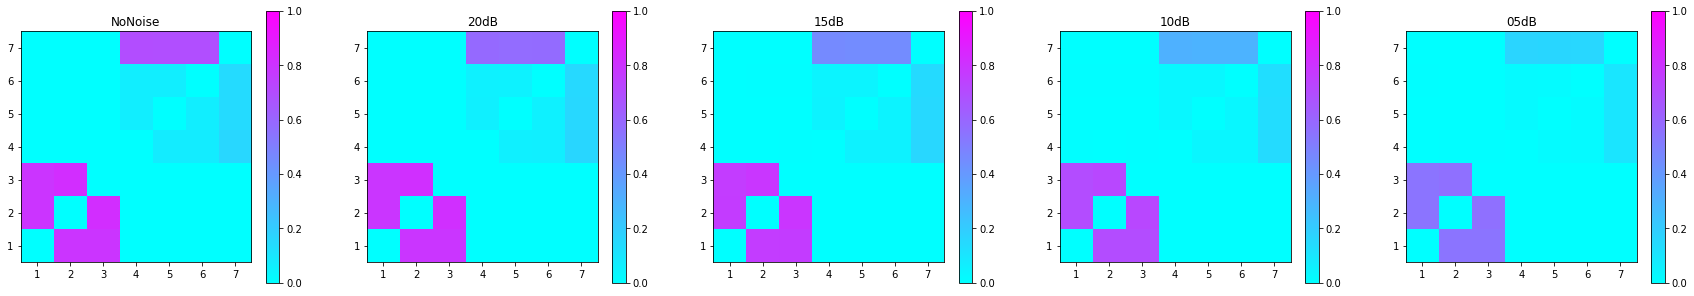

In [7]:
reshaped_arr = data_avg_noise.reshape((5,49 ))
plt.figure(figsize=(30,5))
for i in range(data_avg_noise.shape[0]):
    label = dataset[i].split('data_')[-1].split('__')[0]
    plt.subplot(1,5,i+1)
    c = data_avg_noise[i,:,:]
    np.fill_diagonal(c, 0)
    
    plt.imshow(c,cmap='cool', interpolation='nearest', aspect='equal', origin='lower')
    plt.title(label)
    plt.clim([0,1])
    plt.xticks(np.arange(7), np.arange(1, 8))
    plt.yticks(np.arange(7), np.arange(1, 8))
    plt.colorbar()

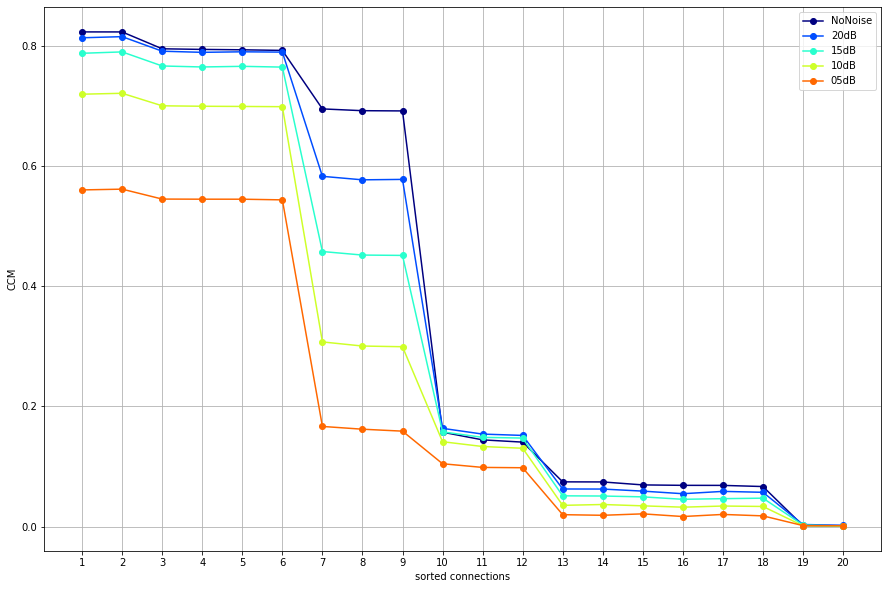

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming reshaped_arr, dataset, and IDX are defined

c = data_avg_noise[0]
np.fill_diagonal(c, 0)
c=np.reshape(c, (49))
sc = np.sort(c)[::-1]
IDX = np.argsort(c)[::-1]

sorted_A = np.zeros(np.shape(reshaped_arr))

plt.figure(figsize=(15, 10))

for i in range(np.shape(reshaped_arr)[0]):
    label = dataset[i].split('data_')[-1].split('__')[0]
    if i == 0:
        sorted_A[i, :] = sc
    else:
        sorted_A[i, :] = reshaped_arr[i, IDX]
    plt.plot(sorted_A[i].T[:20], 'o-', label=label, color=plt.cm.jet(i / np.shape(reshaped_arr)[0]))

plt.legend()
plt.grid()

# Set line and x-axis tickers
plt.xticks(np.arange(20), np.arange(1, 21))
plt.xlabel('sorted connections')
plt.ylabel('CCM')
plt.show()


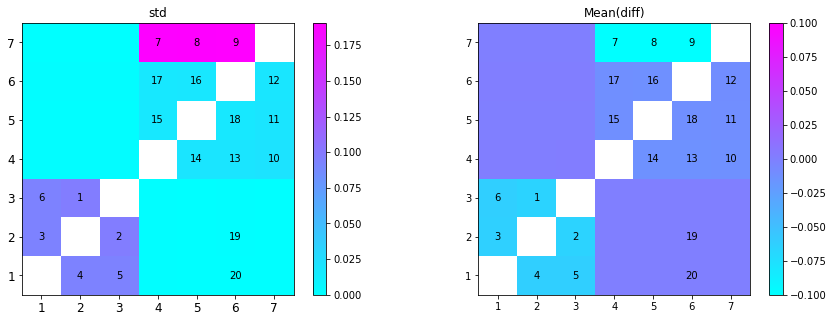

In [9]:

SC_std=np.zeros((7,7))
SC_mean=np.zeros((7,7))

# Statistical Calculation Loop
for k1 in range(7):
    for k2 in range(7):
        SC_std[k1, k2] = np.std(data_avg_noise[:,k1, k2], axis=0)
        SC_mean[k1, k2] = np.mean(np.diff(data_avg_noise[:,k1, k2], axis=0), axis=0)

# Replace diagonal elements with NaN
np.fill_diagonal(SC_std, np.nan)
np.fill_diagonal(SC_mean, np.nan)
ENDE=20
# Heatmap for standard deviation
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(SC_std, cmap='cool', interpolation='nearest', aspect='equal',origin='lower')
# plt.clim([0,0.05])
plt.title('std')
plt.colorbar()
plt.xticks(np.arange(7), np.arange(1, 8))
plt.yticks(np.arange(7), np.arange(1, 8))
plt.grid(visible=False)

plt.gca().tick_params(axis='both', which='major', labelsize=12)


# Transform IDX into a 7x7 array
IDX_7x7 = np.unravel_index(IDX, (7, 7))
# Get the coordinates of the first 20 points
coords_first_20 = list(zip(IDX_7x7[0][:ENDE], IDX_7x7[1][:ENDE]))
i=0
for (row, col) in coords_first_20:
    plt.text(col, row, str(i + 1), color='black', ha='center', va='center')
    i=i+1

plt.subplot(122)

# Calculate MM
MM = np.median(SC_mean.flatten()[IDX]) + np.array([-1, 1]) * np.std(SC_mean.flatten()[IDX])

plt.imshow(SC_mean, cmap='cool', interpolation='nearest', origin='lower', aspect='equal', vmin=MM[0], vmax=MM[1])
plt.colorbar()
plt.xticks(np.arange(7), np.arange(1, 8))
plt.yticks(np.arange(7), np.arange(1, 8))
plt.title('Mean(diff)')
i=0
for (row, col) in coords_first_20:
    plt.text(col, row, str(i + 1), color='black', ha='center', va='center')
    i=i+1


plt.show()


In [10]:
import glob
path='/home/acamassa/ABCD/ClaudiaDDA/NewTest/'
dataset=[]
for filename in glob.iglob(path + 'CD_DDA_data_15dB__*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_15dB_add20*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_15dB_add15*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_15dB_add10*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)
for filename in glob.iglob(path + 'CD_DDA_data_15dB_add05*_'+str(case)+'/CCM_E3_tau20*', recursive=True):
    dataset.append(filename)


In [11]:
dataset

['/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_15dB__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_15dB_add20__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_15dB_add15__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_15dB_add10__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds',
 '/home/acamassa/ABCD/ClaudiaDDA/NewTest/CD_DDA_data_15dB_add05__WL4000_WS2000_WN1000_0_iii/CCM_E3_tau20.rds']

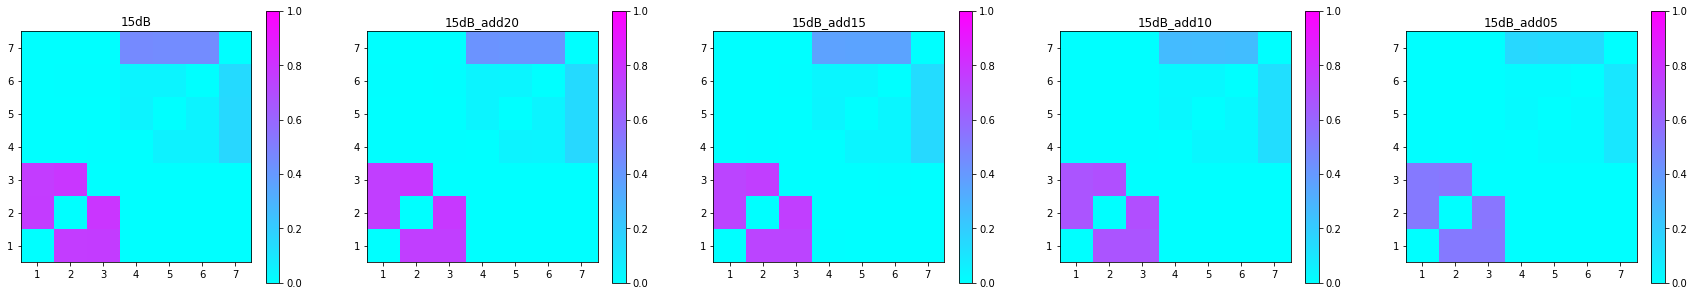

In [12]:
# CCM files
data_avg_noise=np.zeros((len(dataset),7,7))
i=0
for d in dataset:


        result = pyreadr.read_r(d) # also works for RData
        CCM=result[None]
        data=np.reshape(CCM[None].values, (7,7))
        data[data < 0] = 0
        data_avg_noise[i,:,:]=data.T
        i=i+1

reshaped_arr = data_avg_noise.reshape((5,49 ))

plt.figure(figsize=(30,5))
for i in range(data_avg_noise.shape[0]):
    label = dataset[i].split('data_')[-1].split('__')[0]
    plt.subplot(1,5,i+1)
    c = data_avg_noise[i,:,:]
    np.fill_diagonal(c, 0)

    plt.imshow(c,cmap='cool', interpolation='nearest', aspect='equal', origin='lower')
    plt.title(label)
    plt.clim([0,1])
    plt.xticks(np.arange(7), np.arange(1, 8))
    plt.yticks(np.arange(7), np.arange(1, 8))
    plt.colorbar()



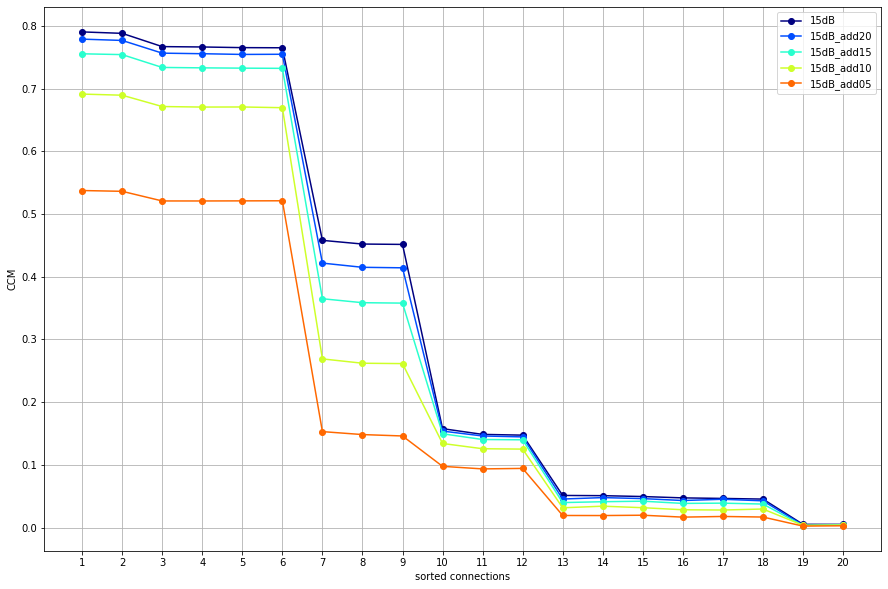

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming reshaped_arr, dataset, and IDX are defined

c = data_avg_noise[0]
np.fill_diagonal(c, 0)
c=np.reshape(c, (49))
sc = np.sort(c)[::-1]
IDX = np.argsort(c)[::-1]

sorted_A = np.zeros(np.shape(reshaped_arr))

plt.figure(figsize=(15, 10))

for i in range(np.shape(reshaped_arr)[0]):
    label = dataset[i].split('data_')[-1].split('__')[0]
    if i == 0:
        sorted_A[i, :] = sc
    else:
        sorted_A[i, :] = reshaped_arr[i, IDX]
    plt.plot(sorted_A[i].T[:20], 'o-', label=label, color=plt.cm.jet(i / np.shape(reshaped_arr)[0]))

plt.legend()
plt.grid()

# Set line and x-axis tickers
plt.xticks(np.arange(20), np.arange(1, 21))
plt.xlabel('sorted connections')
plt.ylabel('CCM')
plt.show()


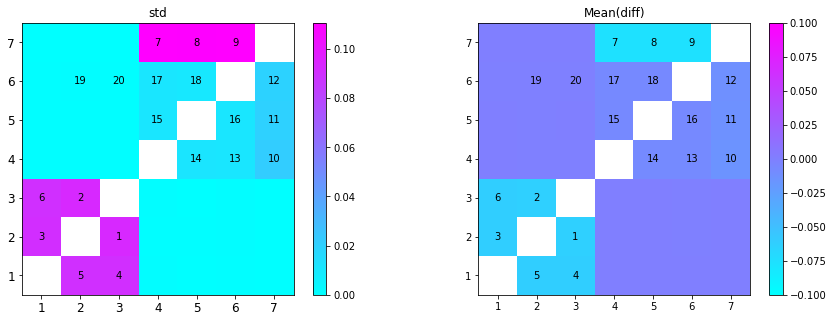

In [14]:
SC=np.reshape(sorted_A, (5,7,7))


SC_std=np.zeros((7,7))
SC_mean=np.zeros((7,7))

# Statistical Calculation Loop
for k1 in range(7):
    for k2 in range(7):
        SC_std[k1, k2] = np.std(data_avg_noise[:,k1, k2], axis=0)
        SC_mean[k1, k2] = np.mean(np.diff(data_avg_noise[:,k1, k2], axis=0), axis=0)

# Replace diagonal elements with NaN
np.fill_diagonal(SC_std, np.nan)
np.fill_diagonal(SC_mean, np.nan)
ENDE=20
# Heatmap for standard deviation
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(SC_std, cmap='cool', interpolation='nearest', aspect='equal', origin='lower')
plt.title('std')
plt.colorbar()
plt.xticks(np.arange(7), np.arange(1, 8))
plt.yticks(np.arange(7), np.arange(1, 8))
plt.grid(visible=False)

plt.gca().tick_params(axis='both', which='major', labelsize=12)


# Transform IDX into a 7x7 array
IDX_7x7 = np.unravel_index(IDX, (7, 7))
# Get the coordinates of the first 20 points
coords_first_20 = list(zip(IDX_7x7[0][:ENDE], IDX_7x7[1][:ENDE]))
i=0
for (row, col) in coords_first_20:
    plt.text(col, row, str(i + 1), color='black', ha='center', va='center')
    i=i+1

plt.subplot(122)

# Calculate MM
MM = np.median(SC_mean.flatten()[IDX]) + np.array([-1, 1]) * np.std(SC_mean.flatten()[IDX])

plt.imshow(SC_mean, cmap='cool', interpolation='nearest', origin='lower', aspect='equal', vmin=MM[0], vmax=MM[1])
plt.colorbar()
plt.xticks(np.arange(7), np.arange(1, 8))
plt.yticks(np.arange(7), np.arange(1, 8))
plt.title('Mean(diff)')
i=0
for (row, col) in coords_first_20:
    plt.text(col, row, str(i + 1), color='black', ha='center', va='center')
    i=i+1


plt.show()




